# 딥러닝 3. Focus on TRANSFORMER

# 1. 인트로
## 1-1. RNN의 한계와 어텐션의 등장(복습)
### RNN의 한계점: 장기 의존성 문제 & Vanishing gradient
- 장기 의존성 문제: 데이터가 길어질수록, 데이터의 후반부에서 초반에 위치한 정보가 잘 반영이 되지 않는 문제, 기울기 소실 문제로 인해 발생함.
### LSTM 모델
- RNN 모델에서 발생하는 기울기 소실 문제를 해결하고자, LSTM 모델이 등장함. '중요한 것은 오래 기억하고, 필요 없는 것은 잊어버리자'라는 아이디어에서 출발함.
- 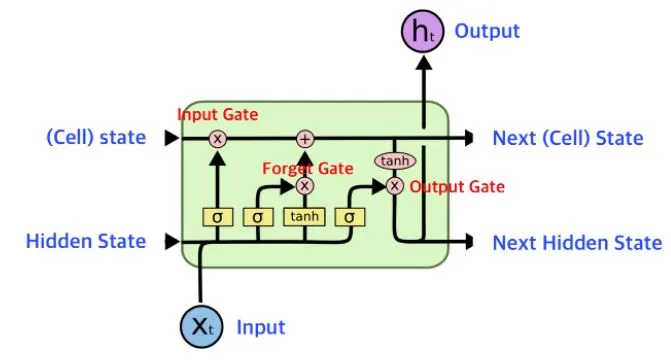
- 이전 Hidden state에서 새로운 중요한 정보는 Input gate를 통해 Cell state로 입력시키고, 이전에 기억하고 있던 내용 중 중요하지 않다고 판단되는 정보는 Forget gate를 통해 잊어버리고, Cell state에 있는 내용 중 이번 Output에 사용할 정보는 Output gate로 가져와서 출력에 사용합니다!
- 한계점
    - 3가지 gate를 운영하므로 계산이 복잡하고 시간이 오래 걸림.
    - 여전히 긴 문장에 있어서는 기울기 소실 문제가 발생함.
---
### Attention의 등장
1. Seq2Seq : input 내용을 다른 시퀀스로 변환하는 모델 구조
- Encoder: 입력된 정보 하나씩 읽은 후, 중요한 내용들을 Context vector로 표현합니다 (원문의 특징 파악)
- Decoder: Encoder에 의해 만들어진 Context vector를 이용해 그것으로 결과를 출력합니다 (번역문 생성)
2. Attention의 등장 배경: Seq2Seq의 병목 현상
- 고정된 크기의 context vector를 사용하면서, 입력 문장이 길어질수록 모든 정보를 고정된 크기의 벡터에 압축하는 것이 어려워져, 일부 입력 데이터들의 소실이 발생하는 문제가 발생하였고, Decoder는 출력하는 단어에 상관 없이 똑같은 Context vector만 참고함.
- 이를 해결하고자, Attention은 Decoder가 단어를 생성할 때마다 입력 문장 전체를 다시 확인하고, 생성하는 단어가 존재하는 내용을 집중적으로 확인하며, 가장 관련있는 정보들만을 이용해 새로운 context vector를 생성함!
3. Attention
- 말 그대로 중요한 것에 집중하는 매커니즘으로, 결과를 만들 때, 입력값의 모든 부분을 동일하게 보지 말고, 지금 이 순간 가장 중요한 부분에 더 높은 가중치를 부여해서 참고하자!라는 핵심 아이디어에서 시작
- 출력 단어를 만들 때, 입력 문장에서 어떤 단어에 얼마나 집중할지를 고르는 기술
- Seq2Seq 방식과의 가장 중요한 차이점은, 바로 출력의 시점마다 새로운 context vector를 동적으로 계산한다는 점 -> 병렬화!
- Attention의 과정
    1. 단어들의 관련도 점수를 매긴 후 점수를 0과 1 사이의 값으로 변환하여, 모든 단어의 중요도를 합치면 1이 되도록 조정함. 이것이 어텐션 가중치
    2. 어텐션 가중치에 따라 특정 단어의 정보에 더 집중 & 낮은 단어 무시 진행하면서 최종 결과를 도출함.
- Attention 매커니즘의 장점
    1. 시간 경과에 대한 유연성(vs RNN)
        - RNN은 고질적인 한계인, 장기 의존성 문제를 가짐.
        - Attention은 모든 단어에서 다른 모든 단어로 직접적인 연결고리를 만들어, 아무리 멀리 떨어진 단어 사이의 관계라도 정보 손실 없이 명확하게 파악할 수 있다! 즉, 시간적(순서적) 거리에 제약을 받지 않는 유연성을 확보함.
    2. 공간에 대한 유연성 (vs CNN)
        - CNN은 고정된 필터를 사용해 이미지의 지역적인 부분만 볼 수 있다는 공간적으로 처리 방식에 제약이 존재
        - Attention은 이미지의 모든 픽셀이 다른 모든 픽셀과 직접 연결되어, 픽셀 간의 거리에 상관없이 한 번에 전체 이미지의 전역적인 관계를 학습할 수 있음.
    3. 병렬화(vs RNN)
        - RNN은 구조적으로 순차 계산이 필수적이라서 병렬 처리가 불가능하고 학습 속도가 매우 느림
        - Attention은 self-attention에서 각 단어간 관계 계산 과정에서 다른 단어의 계산이 끝날 때까지 기다릴 필요 없이, 문장 내 모든 단어의 관계를 한번에, 독립적으로 계산할 수 있음.
    - 어텐션 메커니즘은 NLP 작업에 사용되는 LLM과 관련이 있지만, 이미지 생성에 사용되는 확산 모델이나 비전 분야에서 물체 감지, 이미지 분할과 같은 다양한 작업에서 우수한 성능을 발휘함.


## 1-2. Attention is All You Need
- Transformer 구조를 처음 발표 (Self-Attention 방식)
- Attention을 쓰던 딥러닝 모델들이 대부분 Self-Attention 방식을 채택하게 됨.
- RNN의 순차적 계산 구조를 아예 제거하고, self-attention에 기반한 transformer 모델 제안(오직 Attention만 사용)
- 결과: 병렬화 가능, 모델 학습 속도 획기적 단축, 거대 데이터 다룰 수 있는 모델 제작 가능
- 파급효과: LLM 탄생, NLP 평정, AI의 타 분야로의 확장
---
### Transformer란?
- Transformer는 RNN의 순차적인 계산 방식을 완전히 버리고, 오직 어텐션(Attention)만으로 문장의 의미와 구조를 파악하는 모델임.
- 위에서 살펴봤던 Attention 기반 Seq2Seq에서는 RNN을 사용해서 인코더와 디코더를 구현하고 여기에 attention을 사용한건데, transformer에서는 Attention만으로 인코더와 디코더를 구현한 것
- Transformer의 핵심 기술
    1. Self-Attention: 문장 안에서 어떤 단어가 다른 단어들과 얼마나 중요한 관계를 맺고 있는지 한 번에 파악하는 기술
    2. Multi-Head Attention: 셀프 어텐션을 여러 개의 머리(Head)로 동시에, 서로 다른 관점에서 실행
    3. Positional Encoding: 단어의 위치 정보를 벡터에 추가하여 각 단어가 문장의 몇 번째 위치에 존재하는지 알 수 있음.
- Transformer가 이전과 다른 점
    - 기존에는 두 RNN 기반 인코더, 디코더 사이를 Attention으로 연결하였다면(Context vector의 대체품), Transformer에서는 인코더, 디코더마저 RNN이 아닌 Attention 매커니즘으로 해결한 것!
    - 뭔 소리지 이게?

# 2. Self-Attention
## 2-1. Query, Key, Value
- Attention의 기본 구조
- 모델이 수많은 정보 안에서 가장 관련 있는 정보를 효과적으로 찾아내기(Attention) 위해 3가지 역할로 분할!
1. Q: Query
- 쿼리는 말 그대로 '질문' 또는 '요청'으로, 지금 당장 내가 알고 싶거나, 초점을 맞추고 있는 대상
2. K: Key
- 키는 검색 대상이 되는 모든 정보들이 달고 있는 '이름표' 또는 '색인'. 쿼리는 이 키들과 자신을 비교하여 얼마나 관련이 있는지 확인함.
3. V: Value
- 밸류는 키와 한 쌍으로 묶여 있는 '실제 내용물'. 쿼리와 키의 관련도 계산이 끝나고, 가장 관련성이 높다고 판단된 키가 선택되면, 모델은 그 키에 해당하는 밸류를 가져와 사용
---
## 2-2. 기존 Cross-Attention vs Self-Attention
- 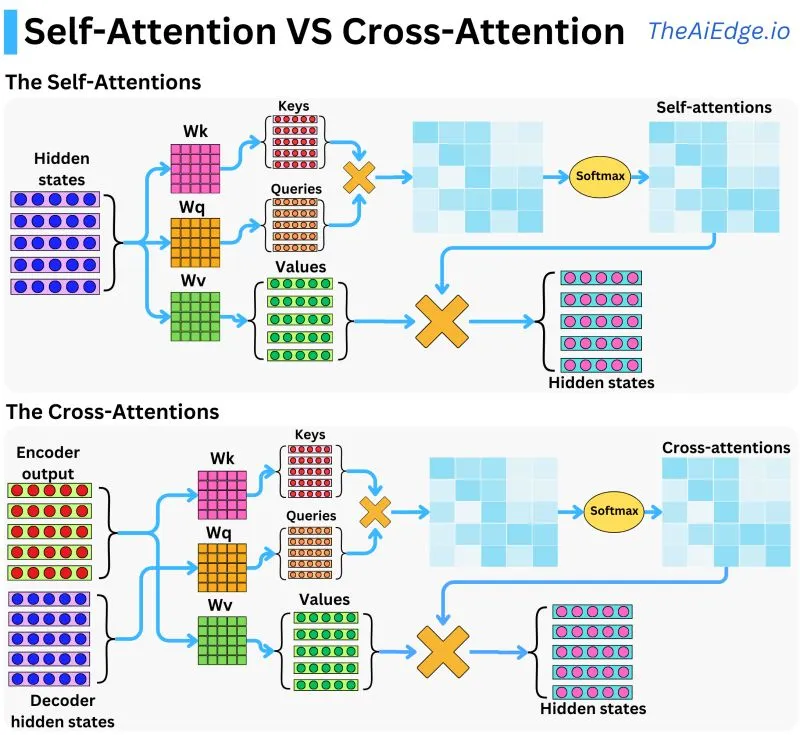

### 기존 Attention in Seq2Seq (Cross-Attention)
- 번역할 문장을 슬쩍슬쩍 보면서 단어를 생성 -> Query와 Key-Value쌍이 서로 다른 시퀀스에서 출력
- Cross Attention은 하나의 시퀀스가 완전히 다른 시퀀스를 참고하여 정보를 만들어내는 매커니즘. -> 즉, Decoder가 Encoder를 참고하는 과정!
- 핵심 과정
    1. Query 만들기
    2. Key, Value 불러오기
    3. 유사도 계산 (Attention Score)
    4. Weighted Sum
    5. Decoder가 다음 단어를 예측

### Self-Attention
- 문장 자체를 뜯어보며 내부의 관계를 파악 -> Query와 Key-Value쌍이 같은 시퀀스에서 출력
- 문장 스스로가 문맥을 이해하는 과정
- 핵심 과정
    1. 단어의 프로필 만들기 (벡터 임베딩)
    2. 단어 간 관계 점수 계산 (내정 및 정렬 점수)
    3. 중요도 배분 (소프트맥스 & 어텐션 가중치)
    4. 문맥이 풍부해진 새로운 프로필 생성
---
## 2-3. Scaled Dot-Product Attention

### Dot-Product Attention
- Attention Score를 계산하는 가장 기본적인 방법 중 하나. 쿼리와 키 벡터를 내적하여 유사도를 구함.
- 기본적인 과정
    1. 쿼리(Q) 벡터와 모든 키(K) 벡터를 각각 내적하여 유사도 계산을 진행
    2. 계산된 값에 Softmax 함수를 적용하여 총합이 1인 Attention Weight 산출
    3. 이 가중치를 밸류(V) 벡터에 곱하여 최종 결과값을 계산
- 문제점
    - 벡터의 차원이 커질수록 내적의 결과가 너무 커지거나 작아짐. 극단적인 Attention Score가 Softmax 함수에 들어가게 되면, gradient의 결과가 0에 가까워지는, Vanishing Gradient가 여기에서도 발생함.

### Scaled Dot-Product Attention
- 기존 Dot-Product Attention의 문제를 해결하고자, 'Attention is All You Need'의 저자들이 제안한 현재 트랜스포머 방식의 표준
- Transformer의 '어텐션 계산 공식' 자체를 의미!
- 내적 후 스케일링 과정을 추가해 문제점 해결
- 바뀐 과정
    1. 쿼리(Q) 벡터와 모든 키(K) 벡터를 각각 내적하여 유사도 계산을 진행
    2. **계산된 값을 $\sqrt{d_K}$ 로 나누어 스케일링을 진행한다**
    3. 스케일링을 진행한 값에 Softmax 함수를 적용하여 총합이 1인 Attention Weight 산출
    4. 이 가중치를 밸류(V) 벡터에 곱하여 최종 결과값을 계산
- 한 번의 나눗셈으로, 계산된 내적 값이 과도하게 증가하는 것을 방지하여 안정적인 분포를 형성하고, 이는 Softmax 함수가 안정적으로 학습을 진행할 수 있도록 함!

- 🔎 Scaled Dot-Product Attention 계산의 결과로 얻어지는 벡터
    - Cross-Attention: 현재 생성 중인 단어가, 입력 문장에서 어떤 단어들에 집중해야 하는지를 반영한 Context Vector
    - Self-Attention: 문장 내 다른 단어들과의 관계를 반영한 문맥적 표현


# 3. Multi-Head Attention
- Transformer 아키텍처의 어느 부분에서 Multi-head Attention이 사용되는가?
- 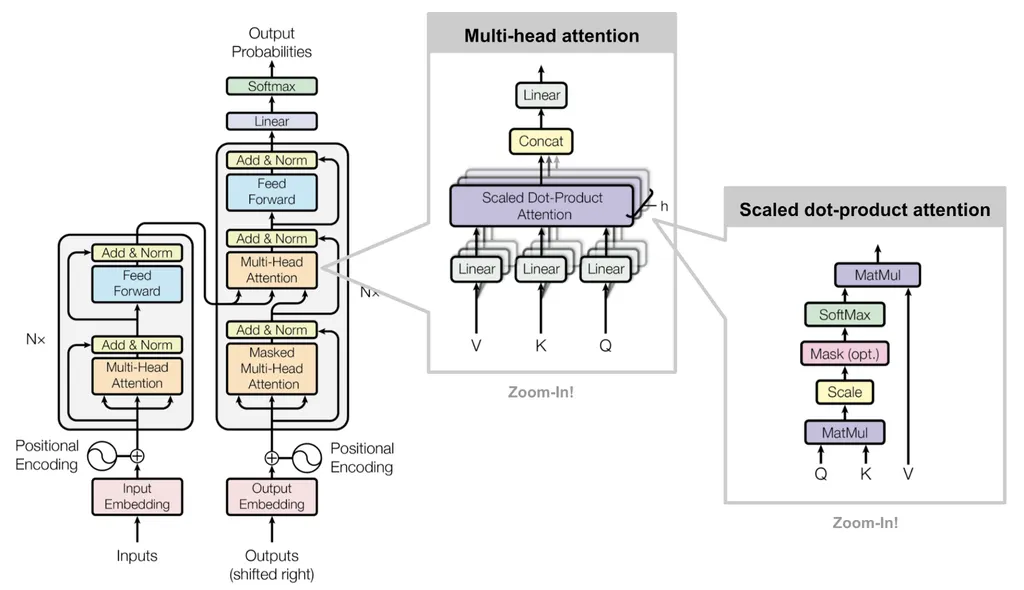
- Multi-Head Attention이 인코더(왼쪽 박스 내부)에서 한 번, 디코더(오른쪽 박스 내부)에서 두 번 일어남. 특히 디코더의 첫 번 째 Multi-Head Attention은 Masked Multi-Head Attention.
- Multi-Head Attention은 인코딩된 토큰들을 아키텍처가 '이해할 때' 사용된다고 알 수 있음.

## 3-1. Why Multi-Head Attention?

### Single Head Attention
- 문장 내 단어들 간의 관계를 파악하기 위해 하나의 가중치 행렬$(W^Q, W^K, W^V)$만을 학습하고 번역에 사용함.
- 작동 방식
    - 512차원의 입력 벡터 → 이 벡터를 위한 어탠션 가중치 분포 계산 → 가중합 하여 새로운 512차원의 벡터를 출력함.
- 한계
    - 하나의 어텐션 분포 안에서 각 단어 간 문법적인 관계, 의미적인 관계, 위치 관계 등 모든 종류의 정보를 한 번에 담아 가중 평균을 구해버리기 때문에, 결국 각 단어 간의 중요한 관계를 놓쳐버릴 수 있음.
---
### Multi-Head Attention
- Multi-Head Attetion은 이와 다르게, 한 단어와 다른 단어 간의 관계를 여러 차원으로 나누어 병렬로 학습함.
- 512차원의 입력 벡터를 64차원씩 8개의 벡터로 나누고, Attention 스코어를 병렬로 여러 번 계산 하는데, 이 과정이 Multi-Head Attention임.

## 3-2. Multi-Head Attention 작동 방식
- “I love you”라는 문장에서 “love”라는 단어의 벡터가 Multi-Head Attention layer를 통과하는 과정을 예시로 설명하겠습니다.
- 각 단어의 차원, 어텐션 헤드의 수, 각 헤드의 차원은 Attention is all you need 논문과 같이 각각 512차원, 8개, 64차원으로 가정하겠습니다.

1. 분할 (Projection) - 8명의 헤드에 단어 벡터 할당
- 'love'라는 단어를 나타내는 하나의 512차원 벡터가 들어오면 이 벡터를 8개의 작은 벡터 그룹(Q, K, V)으로 투영(projection) 하여 8개의 서로 다른 관점으로 나눔.
- 이 입력 벡터에 8세트의 서로 다른 가중치 행렬을 곱함.
- 이제 512차원의 큰 문제 하나가, 서로 다른 관점을 담은 8개의 독립적인 64차원짜리 작은 벡터(Q, K, V 세트)들로 분할됨.
2. 병렬 어텐션 계산 - 각 헤드들이 각자 분석 수행
- 이제 8개의 헤드는 서로 간섭하지 않고, 병렬로 Scaled Dot-Product Attention 계산
- 각 헤드에서 일어나는 일
    1. 관련성 점수 계산 : love의 Query 벡터를 I, love, you의 Key 벡터와 내적
    2. 크기 조절 (Scale): 계산된 점수들을 각 헤드 차원의 제곱근으로 나눠줌
    3. 가중치 변환 (Softmax): 조절된 점수들에 Softmax 함수를 적용하여 총합이 1인 어텐션 가중치를 만듦.
    4. 가중합(Weighted Sum): 이 가중치를 문장 내 모든 단어의 Value 벡터에 곱한 뒤 모두 더함
- 이 결과로 각 헤드의 관점에서 문맥을 이해한 64차원의 결과 벡터 Attention_Output_n 이 나옴.

3. 결합 및 최종 투영 - 전문가들의 분석 결과 취합
- 8개의 헤드 각자 내놓은 8개의 분석 결과를 하나로 합침.
    1. 결합 (Concatenate): 8개의 64차원 벡터들을 순서대로 이어 붙여 하나의 거대한 512차원 벡터를 만듦.
        - Concat_Output = Concat(Attention_Output_1, Attention_Output_2, ..., Attention_Output_8)
    2. 최종 투영 (Final Projection): 이 512차원 벡터는 아직 각 헤드의 분석 결과가 단순히 나열된 상태. 이 정보들을 잘 융합하고 최종적으로 정리하기 위해, 또 다른 가중치 행렬을 곱해줌.
        - Final_Output = Concat_Output × $W^O$
- 이 Final_Output이 바로 'love'라는 단어에 대한 Multi-Head Attention 레이어의 최종 출력 벡터임. 이 벡터는 8개의 서로 다른 관점에서 분석된 정보가 조화롭게 융합된, 매우 풍부한 문맥적 의미를 담고 있음.

# 4. Transformer 전체 아키텍처
- 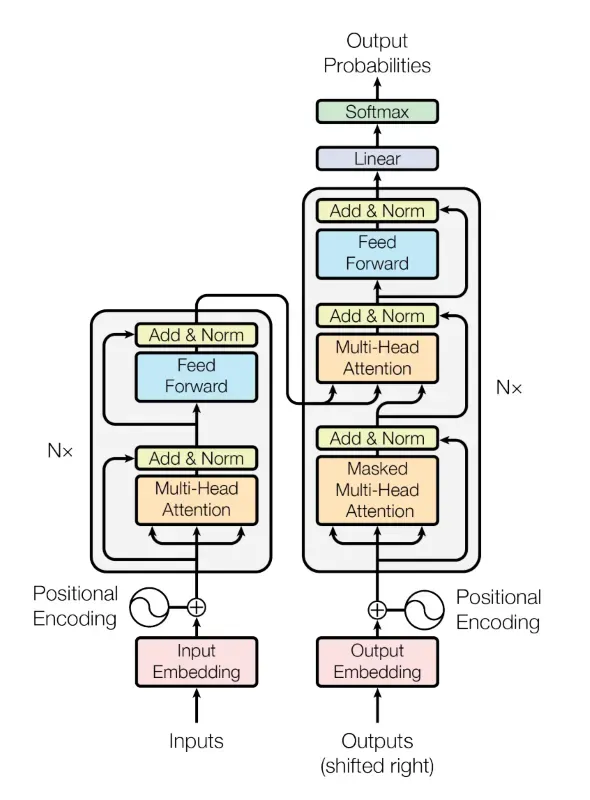

## 4-1. 트랜스포머의 전처리 단계
- 입력 받음 -> 텍스트 토큰화 -> 토큰 임베딩 -> Positional Encoding으로 순서 정보 추가

### 1️⃣ 토큰화 (Tokenization)
- 토큰화는 입력 텍스트를 모델이 처리할 수 있는 단위(tokens)로 나누는 첫 번째 단계임.
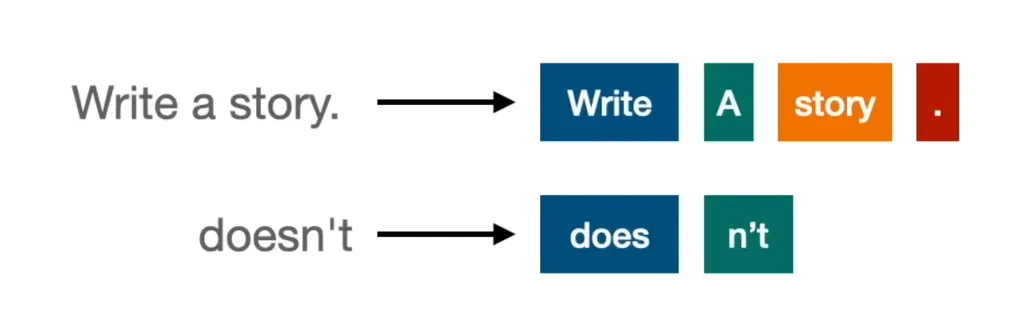
- 토큰화 방법  
a. 대부분의 경우 각 토큰은 하나의 단어에 해당됨. ex) Write, A, Story  
b. 문장 부호 역시 별도의 토큰을 가짐. ex) . , !  
c. 일부 단어는 하나 이상의 토큰으로 나뉠 수 있음. ex) doesn't -> does, n't  

### 2️⃣ 임베딩 (Embedding)
- 토큰화된 각 단위(토큰)는 인베딩 단계에서 숫자의 벡터로 변환됨.
    - 인간의 언어를 컴퓨터의 언어(숫자)로 번역하는 역할
- 임베딩의 구조
    - 임베딩은 많은 숫자로 이루어진 긴 벡터로 단어를 나타냄. 이 벡터의 길이가 바로 벡터의 차원이 됨.
- 임베딩의 가장 중요한 원리는 단어의 의미를 공간적으로 표현하는 것
- 의미적으로 유사한 단어들은 임베딩 공간에서 유사한 숫자(좌표)로 변환되어야 함.
- 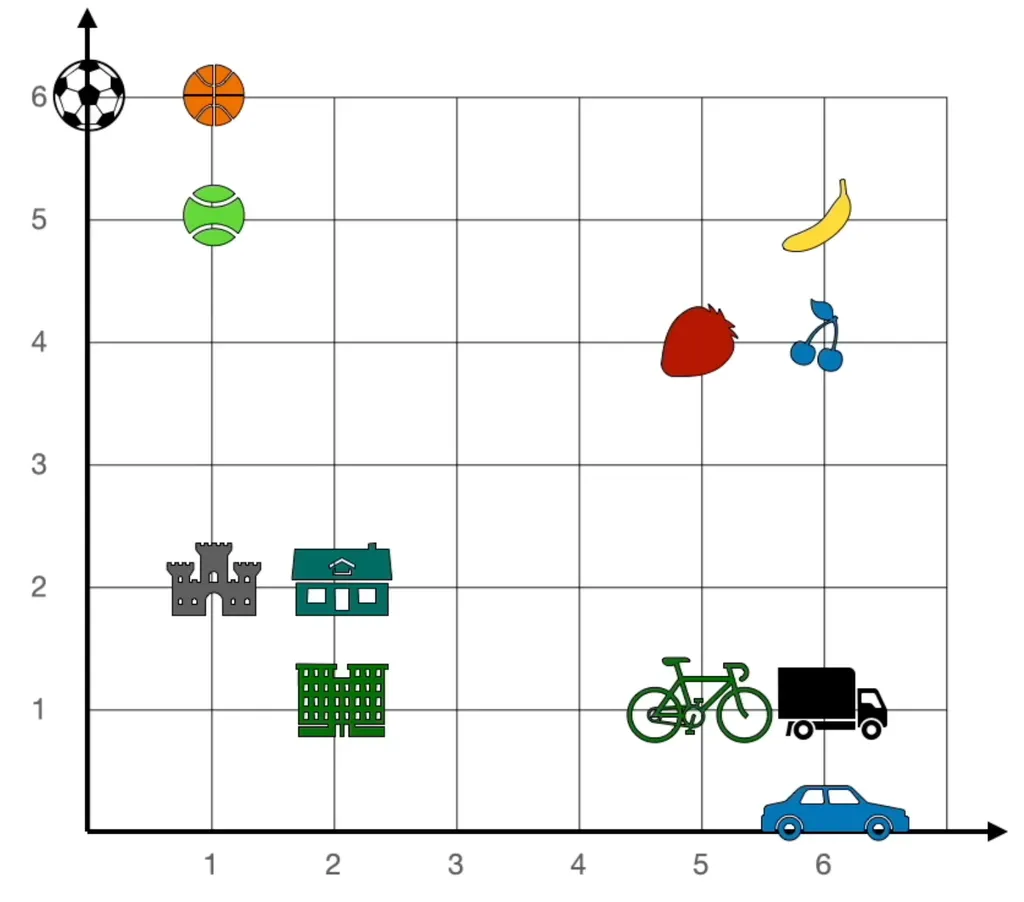
- 이러한 유사성 덕분에, 임베딩은 단어의 문맥을 포착하고 단어 간의 관계를 파악하는 어텐션 메커니즘이 작동하기 전에 단어에 대한 기본적인 속성을 제공함.

### 3️⃣ Positional Encoding
- Positional Encoding은 단어들의 순서 정보를 임베딩 벡터에 추가하는 단계임.
- Transformer는 모든 단어를 병렬로 한 번에 처리해서, 단어의 순서를 알지 못함. 같은 단어의 집합이라면 실제로는 의미가 다른데도 똑같은 것으로 인식됨.
    - ex) "개는 고양이를 쫓는다"와 "고양이는 개를 쫓는다”을 다르다고 구분하지 못합니다.
- 단어들은 문법적 측면이나, 문맥을 파악하기 위해서나 등장한 순서가 매우 중요하기 때문에, 이 순서 정보, 즉 위치 정보를 제공하기 위해 positional encoding을 사용함.

- 동작 방법
- 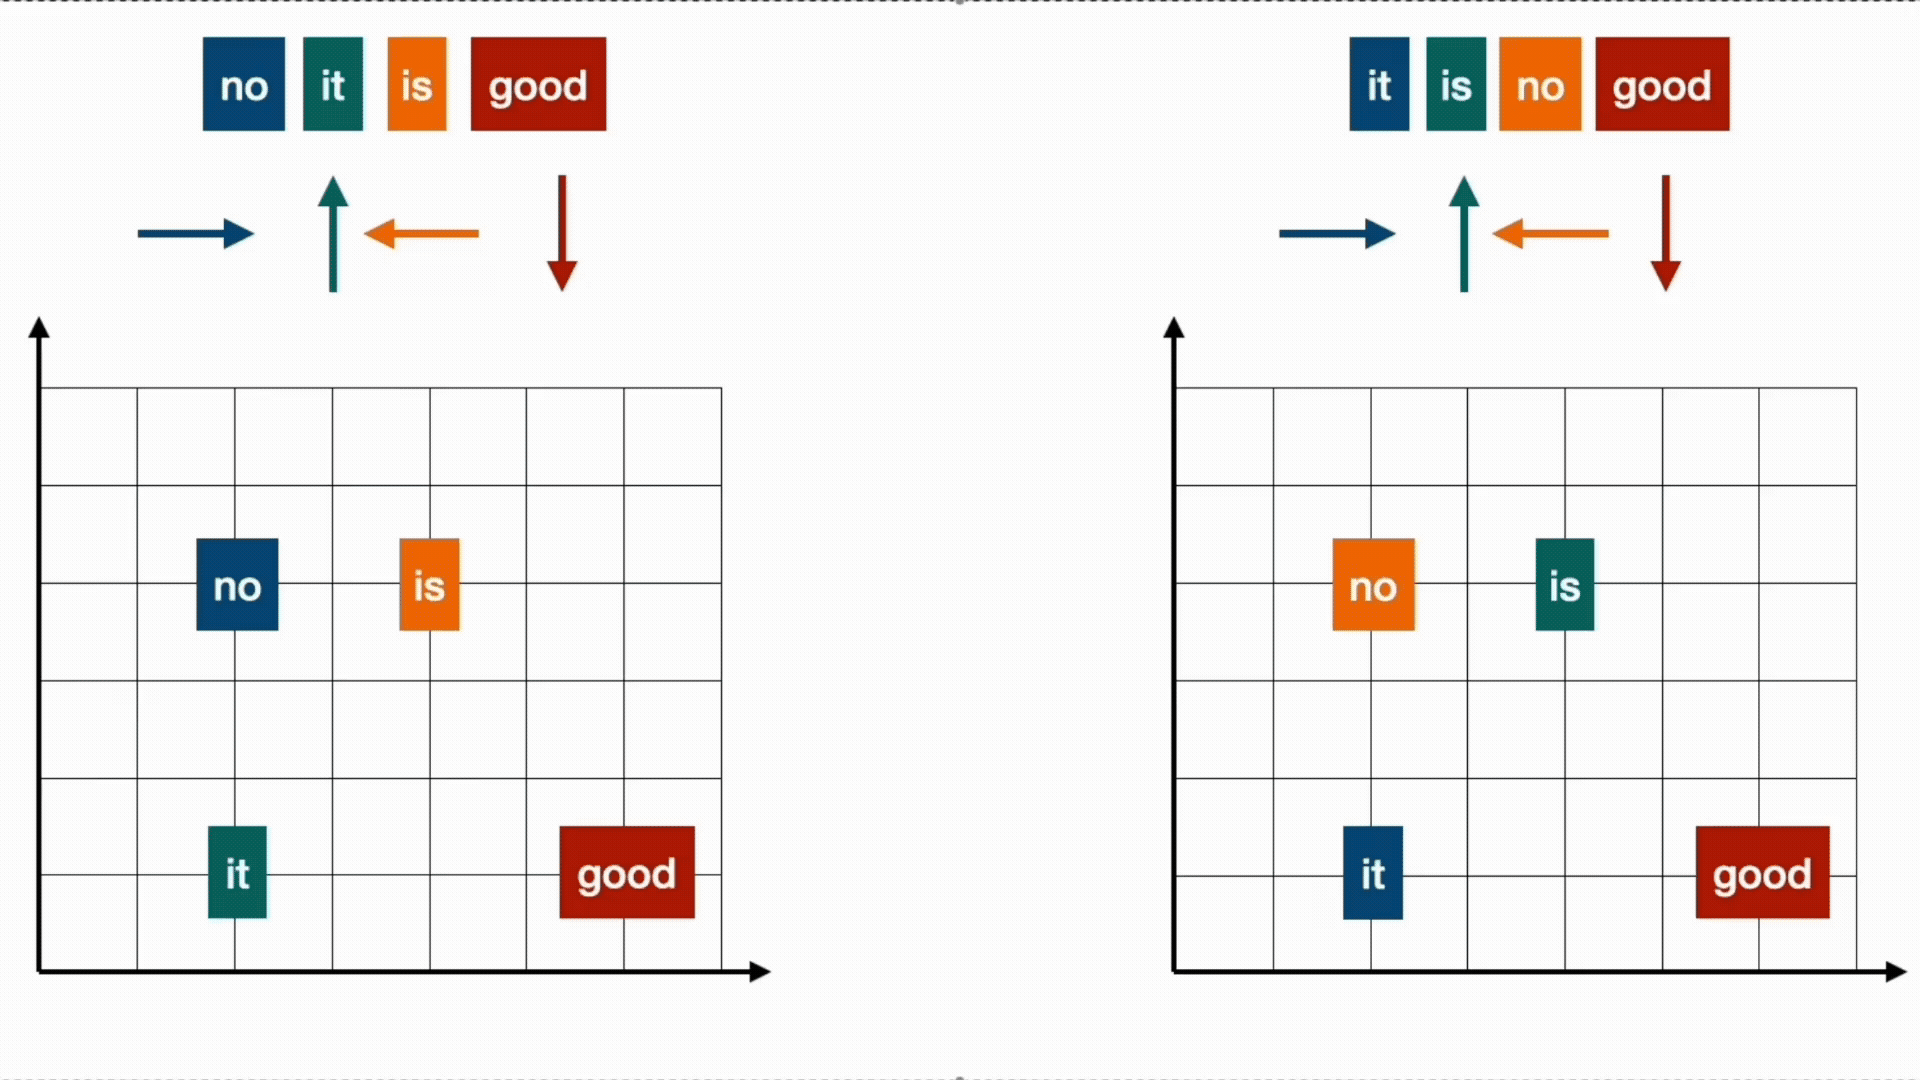
- 각 단어의 임베딩 좌표에 일관된 순서를 따르는 다른 숫자를 추가하여 순서 정보를 기록함.
- 이 과정을 통해, 같은 단어라도 문장에서 차지하는 위치가 다르면 최종적으로 다른 좌표(수정된 임베딩)을 가지게 되며, 이는 모델이 순서를 학습할 수 있도록 도움.

## 4-2. 트랜스포머의 Encoder와 Decoder

### 1️⃣ Encoder
- 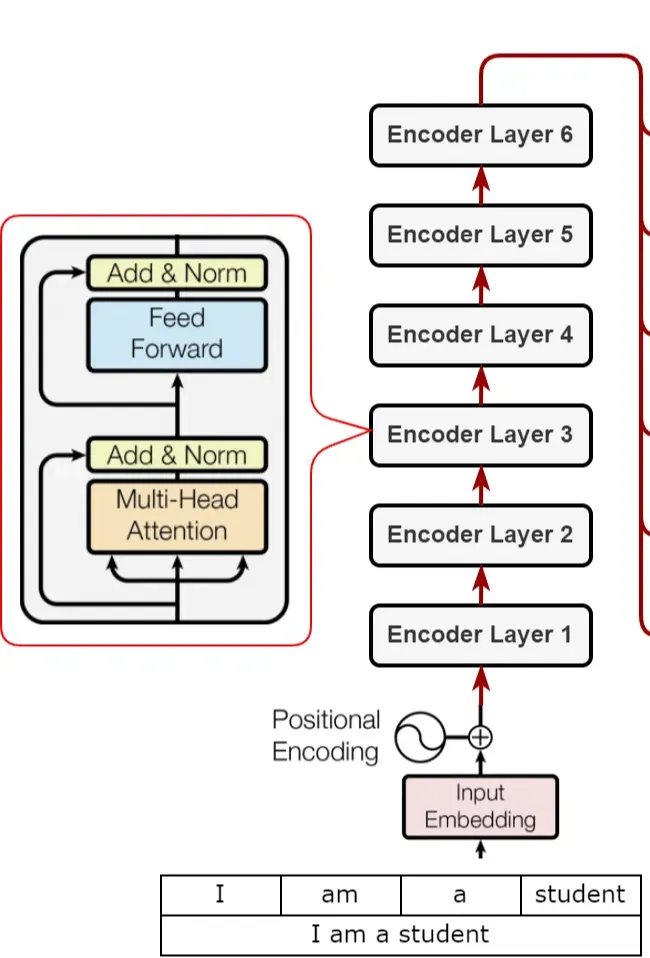
- 트랜스포머의 Encoder는 입력 문장을 이해하고 요약된 의미 벡터로 변환하는 역할을 함.
- 전처리 과정(토큰화, 임베딩, Positional Encoding) 및 인코더 레이어(Multi-Head Attention, Feed Forward Layer)로 구성되어 있음.

#### 인코더 레이어의 구성
- 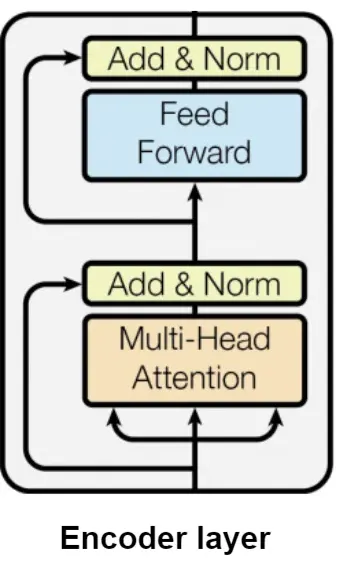
- 인코더 레이어는 다음 두 가지 주요 하위 레이어로 구성됨.
1. Multi-Head Attention
2. Feed-Forward

- **Feed Forward Layer (FFN)**
    - 입력 벡터의 차원을 확장하고 비선형 변환(ex:ReLU)을 적용하여 새로운 표현을 생성하는 신경망 구조
    - 1차시 때 배웠던 MLP가 2층으로 완전 연결된 구조
    - 입력된 문장을 번역한다고 할 때, 각 단어에 대해, 단어 하나하나를 전문 분석가에게 넘겨서 더 깊이 있는 설명으로 다듬는 것
    - Attention에서 어떤 단어를 더 집중해서 볼지를 정했다면, Feed-Forward에서는 그 단어에 대해 심층 분석을 하는 것

- Q. 그런데 Feed Forward와 Multi-Head Attention 위에 달린 Add & Norm은 뭔가요?
- A. (1) Residual connections (잔차 연결)
- 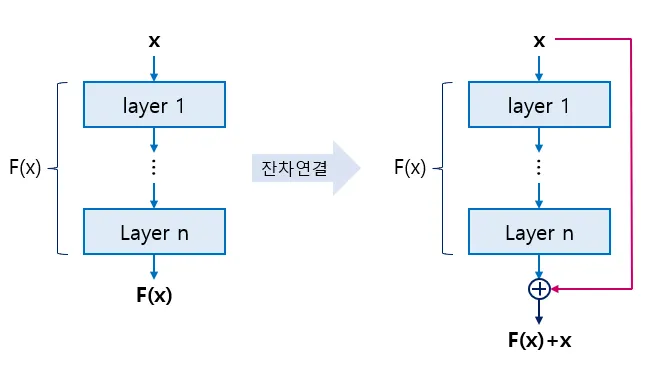
    - 입력 값을 그대로 출력에 더해 주는 것
    - 앞선 CNN 모델 중에 ResNet이라는 모델에서 나온 방법
    - 왼쪽 그림처럼 층이 쌓익 되면 기울기 소실 및 폭주 현상이 발생할 수 있으므로, 오른쪽 그림처럼 지름길을 만들어서 출력에 입력값을 바로 전달해 주는 것
    - 이렇게 하면 여러 층을 거쳐야 했던 과정이 축약되어서 layer가 많이 쌓여도 학습이 잘 됨.
- A. (2) Layer Normalization (층 정규화)
    - 입력 벡터의 평균과 분산을 사용해서 정규화하는 것
    - 학습을 안정화하고 모델이 빠르게 수렴하게 만들어 줌.

### 2️⃣ Decoder
- 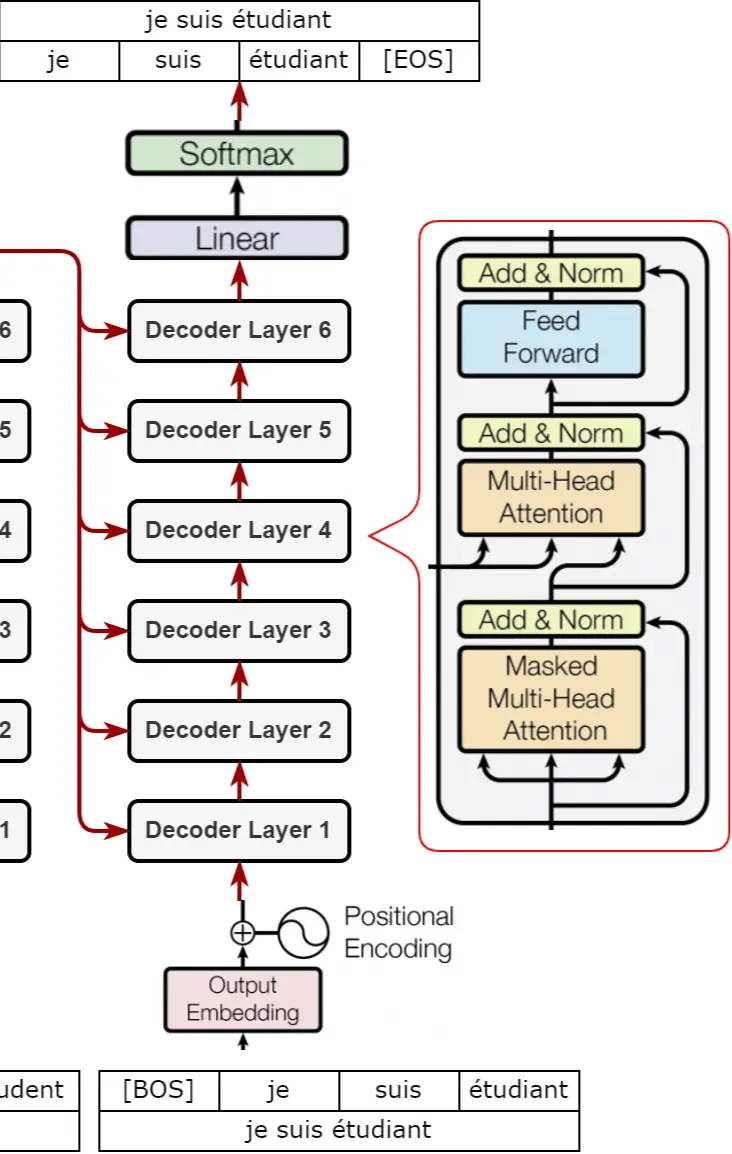
- 트랜스포머의 Decoder는 Encoder가 분석한 입력 문장의 의미 벡터를 받아서 출력 문장을 순차적으로 생성하는 역할을 담당함.
- 전처리 과정, 디코더 레이어, 선형 레이어와 소프트맥스 레이어로 이루어져 있음.

#### 디코더 레이어의 구성
- 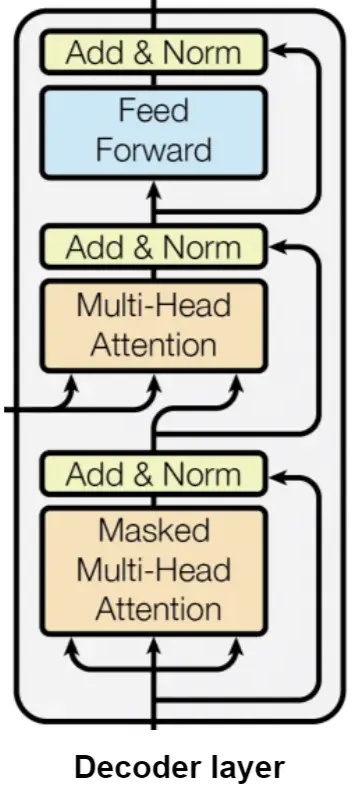
- 디코더 레이어는 다음과 같은 세 가지 하위 레이어로 구성됨.
1. Masked Multi-Head Attention
2. Encoder-Decoder Multi-Head Attention(Cross-Attention)
3. Feed-Forward Layer

- **Masked Multi-Head Attention**
    - 미래 시점의 단어 정보를 참고하지 못하도록 마스크(mask)를 적용하는 어텐션 메커니즘
    - 트랜스포머의 디코더는 시퀀스를 왼쪽에서 오른쪽으로(autogressive) 생성하며, 모델이 이미 생성된 단어들(과거 정보)만을 기반으로 다음 단어를 예측하도록 강제함.
    - 이를 위해 Look-Ahead Mask(Casual Mask)를 사용하여 현재 단어보다 오른쪽(미래)에 있는 토큰의 어텐션 값을 0으로 만들어 무시함.

- **Encoder-Decoder Attention (Cross-Attention)**
    - 디코더가 인코더의 출력(Context)를 참고하면서 현재 생성 중인 단어를 입력 문장의 의미와 연결하는 과정
    - 이렇게 해서 디코더가 입력 문장 중 어떤 부분에 주목해야 하는지를 학습함.

| 벡터 종류 | 어디서 오는가 |
| --- | --- |
| **Query (Q)** | 디코더의 이전 서브레이어 출력 |
| **Key (K)**, **Value (V)** | 인코더의 최종 출력 (Context Vector) |



## 4-3. 전체 모델 및 데이터 흐름
- 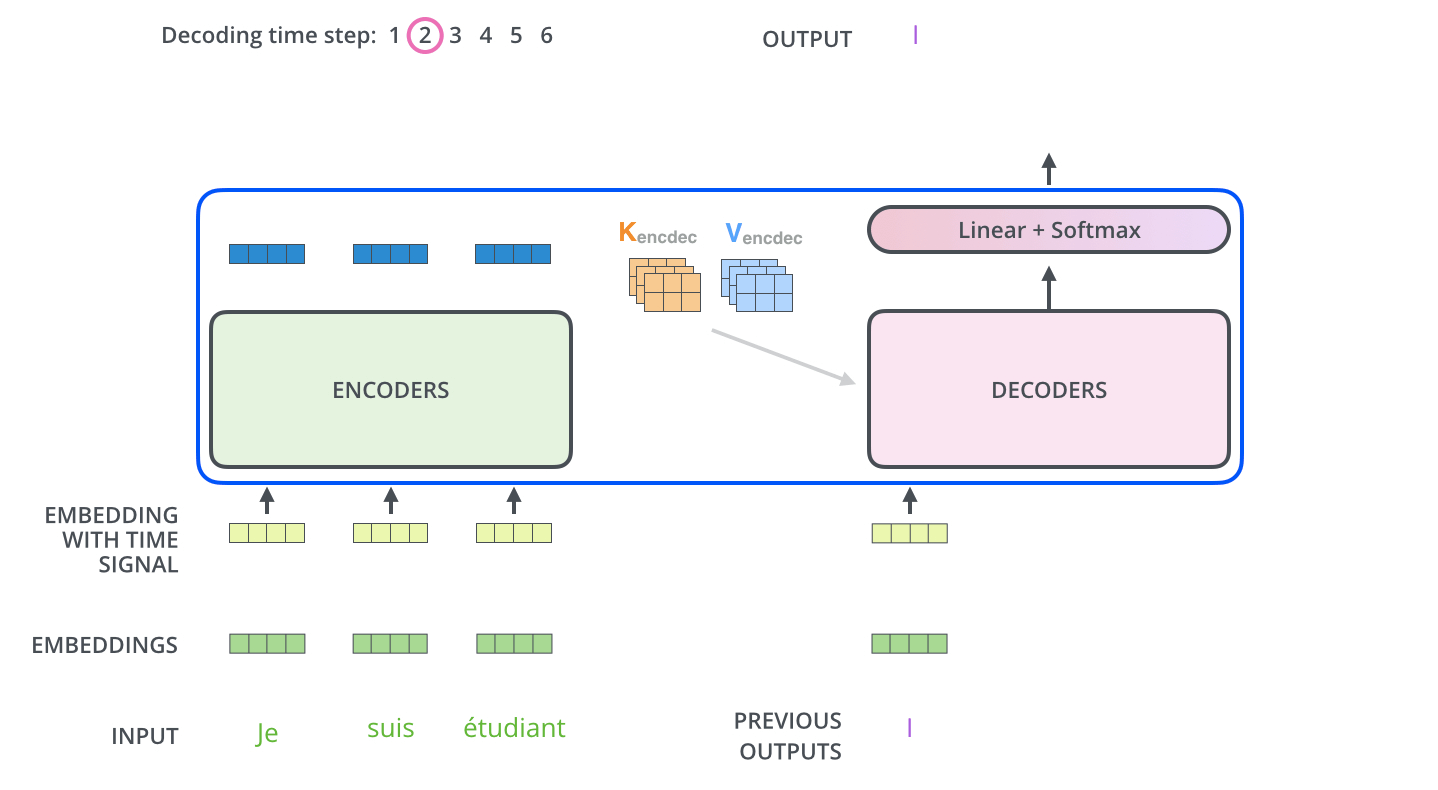
- 마지막으로, `I love you`를 트랜스포머로 번역해 보면서 전체 모델 및 데이터 흐름을 짚고 마무리해 봅시다!

### 1️⃣ 입력 준비: 문장을 [의미 + 위치] 벡터로 바꾸기
- 컴퓨터가 이해하도록 모든 단어들을 숫자 벡터로 바꿔주기

| **과정** | **설명** | **예시 적용** |
| --- | --- | --- |
| **임베딩 (Embedding)** | 각 단어를 **의미**를 담은 숫자 벡터(예: 512차원)로 변환 | **`I`**, **`love`**, `you`를 각각의 의미 벡터로 변환 |
| **포지셔널 인코딩** | 순서 정보를 알 수 없으므로, 각 단어의 **위치**에 해당하는 벡터를 의미 벡터에 더하기 | `I`(1번째), `love`(2번째), `you`(3번째)에 각각 다른 위치 벡터를 더함 |

- **의미와 위치 정보**를 모두 갖춘 벡터가 인코더의 입력이 됨.

### 2️⃣ 인코더: 입력 문장의 [문맥적 의미] 깊이 이해하기
- 인코더는 Self-Attention을 이용해 입력 문장 내 모든 단어 간의 관계를 파악함. 이 과정을 N번 반복하여 문장을 완벽하게 이해함.
- 

